# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

608


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
citiesdf=pd.DataFrame({'City':cities})
citiesdf['Country']=""
citiesdf['Date']=""
citiesdf['Humidity']=""
citiesdf['Cloudiness']=""
citiesdf['Lat']=""
citiesdf['Lng']=""
citiesdf['Max Temp']=""
citiesdf['Wind Speed']=""

citiesdf.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,greenville,,,,,,,,
1,nizhneyansk,,,,,,,,
2,taolanaro,,,,,,,,
3,adrar,,,,,,,,
4,ushuaia,,,,,,,,


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="

In [5]:
from datetime import datetime

for index, row in citiesdf.iterrows():
    city = row['City']
    response = requests.get(query_url + city + '&units=imperial').json()
    try:
        citiesdf.loc[index, 'Country'] = response['sys']['country']
        citiesdf.loc[index, 'Date'] = datetime.fromtimestamp(response['dt'])
        citiesdf.loc[index, 'Humidity'] = response['main']['humidity']
        citiesdf.loc[index, 'Cloudiness'] = response['clouds']['all']
        citiesdf.loc[index, 'Lat'] = response['coord']['lat']
        citiesdf.loc[index, 'Lng'] = response['coord']['lon']
        citiesdf.loc[index, 'Max Temp'] = response['main']['temp_max']
        citiesdf.loc[index, 'Wind Speed'] = response['wind']['speed']    
        print(f"Processing Record {index} of {len(cities)} for: {city}.")
    except (KeyError, IndexError):
        print('City not found, skipping')
        next
    print('===========================')


Processing Record 0 of 608 for: greenville.
City not found, skipping
City not found, skipping
Processing Record 3 of 608 for: adrar.
Processing Record 4 of 608 for: ushuaia.
Processing Record 5 of 608 for: port elizabeth.
Processing Record 6 of 608 for: busselton.
Processing Record 7 of 608 for: havoysund.
Processing Record 8 of 608 for: tessalit.
Processing Record 9 of 608 for: barrow.
Processing Record 10 of 608 for: ribeira grande.
Processing Record 11 of 608 for: punta arenas.
Processing Record 12 of 608 for: saint-francois.
Processing Record 13 of 608 for: margate.
Processing Record 14 of 608 for: rikitea.
Processing Record 15 of 608 for: georgetown.
City not found, skipping
Processing Record 17 of 608 for: hermanus.
Processing Record 18 of 608 for: keningau.
Processing Record 19 of 608 for: tasiilaq.
Processing Record 20 of 608 for: makurdi.
Processing Record 21 of 608 for: cape town.
Processing Record 22 of 608 for: turayf.
Processing Record 23 of 608 for: kapaa.
Processing Reco

City not found, skipping
Processing Record 119 of 608 for: eston.
Processing Record 120 of 608 for: khatanga.
Processing Record 121 of 608 for: kruisfontein.
Processing Record 122 of 608 for: albany.
Processing Record 123 of 608 for: awjilah.
Processing Record 124 of 608 for: roald.
Processing Record 125 of 608 for: honningsvag.
Processing Record 126 of 608 for: odessa.
Processing Record 127 of 608 for: chernyshevskiy.
Processing Record 128 of 608 for: taltal.
Processing Record 129 of 608 for: karasburg.
Processing Record 130 of 608 for: east london.
Processing Record 131 of 608 for: kavaratti.
Processing Record 132 of 608 for: ayagoz.
Processing Record 133 of 608 for: gorgan.
Processing Record 134 of 608 for: vaini.
Processing Record 135 of 608 for: high prairie.
Processing Record 136 of 608 for: nikolskoye.
Processing Record 137 of 608 for: lasa.
City not found, skipping
Processing Record 139 of 608 for: flora.
Processing Record 140 of 608 for: te anau.
City not found, skipping
Proce

Processing Record 234 of 608 for: naze.
Processing Record 235 of 608 for: tual.
Processing Record 236 of 608 for: namatanai.
City not found, skipping
Processing Record 238 of 608 for: kavieng.
Processing Record 239 of 608 for: along.
Processing Record 240 of 608 for: sao filipe.
City not found, skipping
Processing Record 242 of 608 for: lebu.
City not found, skipping
Processing Record 244 of 608 for: camacha.
Processing Record 245 of 608 for: okha.
Processing Record 246 of 608 for: ambon.
Processing Record 247 of 608 for: maldonado.
Processing Record 248 of 608 for: camapua.
Processing Record 249 of 608 for: hovd.
Processing Record 250 of 608 for: huatulco.
Processing Record 251 of 608 for: trebur.
Processing Record 252 of 608 for: pacific grove.
Processing Record 253 of 608 for: nouadhibou.
Processing Record 254 of 608 for: walvis bay.
Processing Record 255 of 608 for: bengkulu.
Processing Record 256 of 608 for: halifax.
Processing Record 257 of 608 for: victoria.
Processing Record 25

Processing Record 352 of 608 for: talnakh.
Processing Record 353 of 608 for: kamaishi.
Processing Record 354 of 608 for: japura.
Processing Record 355 of 608 for: tuatapere.
Processing Record 356 of 608 for: acarau.
Processing Record 357 of 608 for: hofn.
Processing Record 358 of 608 for: mabaruma.
Processing Record 359 of 608 for: vila velha.
Processing Record 360 of 608 for: broome.
Processing Record 361 of 608 for: svetlogorsk.
Processing Record 362 of 608 for: deputatskiy.
Processing Record 363 of 608 for: phayao.
Processing Record 364 of 608 for: fort payne.
Processing Record 365 of 608 for: loukhi.
Processing Record 366 of 608 for: tilichiki.
Processing Record 367 of 608 for: kailua.
Processing Record 368 of 608 for: ust-ilimsk.
Processing Record 369 of 608 for: hambantota.
Processing Record 370 of 608 for: broken hill.
Processing Record 371 of 608 for: gamboma.
Processing Record 372 of 608 for: kahului.
Processing Record 373 of 608 for: udachnyy.
Processing Record 374 of 608 for

Processing Record 469 of 608 for: orlik.
Processing Record 470 of 608 for: grootfontein.
Processing Record 471 of 608 for: tabou.
Processing Record 472 of 608 for: unnao.
Processing Record 473 of 608 for: maloy.
Processing Record 474 of 608 for: northam.
Processing Record 475 of 608 for: shebalino.
Processing Record 476 of 608 for: khorramshahr.
Processing Record 477 of 608 for: tarauaca.
Processing Record 478 of 608 for: olafsvik.
Processing Record 479 of 608 for: garagoa.
Processing Record 480 of 608 for: eyl.
Processing Record 481 of 608 for: vallenar.
Processing Record 482 of 608 for: smoky lake.
City not found, skipping
Processing Record 484 of 608 for: handan.
Processing Record 485 of 608 for: vao.
Processing Record 486 of 608 for: sale.
Processing Record 487 of 608 for: port lincoln.
Processing Record 488 of 608 for: mao.
Processing Record 489 of 608 for: kozhva.
City not found, skipping
Processing Record 491 of 608 for: poum.
Processing Record 492 of 608 for: odweyne.
Processin

Processing Record 585 of 608 for: requena.
Processing Record 586 of 608 for: saint-denis.
Processing Record 587 of 608 for: chapais.
Processing Record 588 of 608 for: evensk.
Processing Record 589 of 608 for: quesnel.
City not found, skipping
Processing Record 591 of 608 for: ovsyanka.
Processing Record 592 of 608 for: bowen.
Processing Record 593 of 608 for: pinega.
Processing Record 594 of 608 for: athabasca.
Processing Record 595 of 608 for: paraiso.
Processing Record 596 of 608 for: bac lieu.
Processing Record 597 of 608 for: coihueco.
Processing Record 598 of 608 for: strezhevoy.
Processing Record 599 of 608 for: ahipara.
Processing Record 600 of 608 for: rio grande.
Processing Record 601 of 608 for: adelaide.
Processing Record 602 of 608 for: presidencia roque saenz pena.
Processing Record 603 of 608 for: nagornyy.
Processing Record 604 of 608 for: watsonville.
Processing Record 605 of 608 for: scarborough.
Processing Record 606 of 608 for: barra patuca.
Processing Record 607 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
citiesdf=citiesdf.replace(r'^\s*$', np.nan, regex=True)
citiesdf=citiesdf.dropna(how='any')
output_data_file = "output_data/cities.csv"
citiesdf.to_csv(output_data_file, index=False)

In [8]:
citiesdf.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,greenville,US,2020-01-26 09:07:19,56.0,1.0,35.61,-77.37,48.20,6.93
3,adrar,MR,2020-01-26 09:07:19,13.0,96.0,20.50,-10.07,86.52,12.28
4,ushuaia,AR,2020-01-26 09:05:55,81.0,75.0,-54.80,-68.30,46.40,24.16
5,port elizabeth,ZA,2020-01-26 09:05:17,63.0,91.0,-33.92,25.57,66.20,34.45
6,busselton,AU,2020-01-26 09:07:20,37.0,0.0,-33.65,115.33,73.99,12.08


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot 
Comment:Max Temperature has a curvilinear relationship to Latitude. There seems to be a negative correlation to latitudes above zero, and a positive correlation to latitudes below zero.

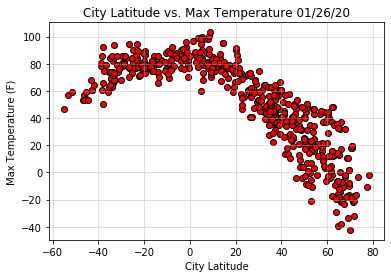

In [10]:
latitude=citiesdf['Lat']
max_temp=citiesdf['Max Temp']
today = time.strftime('%x')

plt.scatter(latitude, max_temp, facecolor='r', edgecolor='k')
plt.title(f'City Latitude vs. Max Temperature {today}')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(alpha=0.5)

#### Latitude vs. Humidity Plot
    Comment: There seems to be a slight positive correlation between latitude and humidity, but based on the spread of the data, I would assume that it is not a strong one.

In [ ]:
humidity=citiesdf['Humidity']

plt.scatter(latitude, humidity, facecolor='g', edgecolor='k')
plt.title(f'City Latitude vs. Humidity {today}')
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.grid(alpha=0.5)

#### Latitude vs. Cloudiness Plot
Comment: There does not seem to be any correlation between latitude and cloudiness.

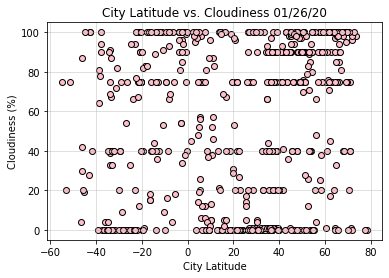

In [11]:
cloudiness=citiesdf['Cloudiness']

plt.scatter(latitude, cloudiness, facecolor='pink', edgecolor='k')
plt.title(f'City Latitude vs. Cloudiness {today}')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(alpha=0.5)

#### Latitude vs. Wind Speed Plot
Comment: Again, if I were to guess from the graph, I would say that latitude and wind speed are not correlated.

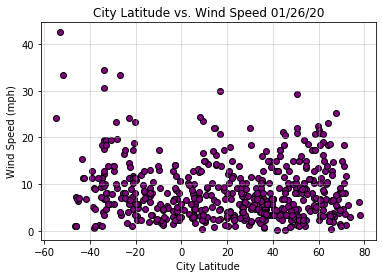

In [13]:
wind_speed=citiesdf['Wind Speed']

plt.scatter(latitude, wind_speed, facecolor='purple', edgecolor='k')
plt.title(f'City Latitude vs. Wind Speed {today}')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(alpha=0.5)

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def lregress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    x=float(input('x-value for location of line equation'))
    y=float(input('y-value for location of line equation'))
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.title(input('Title of figure:'))
    plt.xlabel(input('X-label:'))
    plt.ylabel(input('Y-label:'))
    plt.grid()
    plt.show()
    print(f"R-value: {rvalue}, P-value: {pvalue}")

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern=citiesdf[citiesdf['Lat'] > 0]
southern=citiesdf[citiesdf['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
Comment: There is a strong (r-square=-0.88) negative correlation between latitude and maximum temperature in the Northern Hemisphere.

x-value for location of line equation5
y-value for location of line equation-20
Title of figure:Northern Hemisphere - Max Temp vs. Latitude (1/26/20)
X-label:Latitude
Y-label:Max Temperature (F)


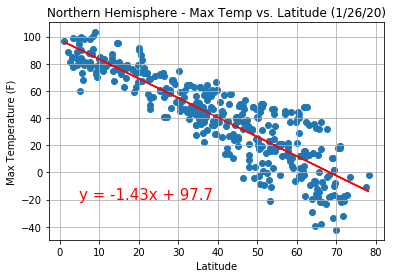

R-value: -0.8839020241324345, P-value: 3.9611696349285855e-130


In [17]:
nmax=northern['Max Temp']
nlat=northern['Lat']

lregress(nlat,nmax)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Comment: There is a moderate (r-squared=0.63) positive correlation between latitude and maximum temperature in the Southern Hemisphere.

x-value for location of line equation-50
y-value for location of line equation45
Title of figure:Southern Hemisphere - Max Temp vs. Latitude (1/26/20)
X-label:Latitude
Y-label:Max Temp (F)


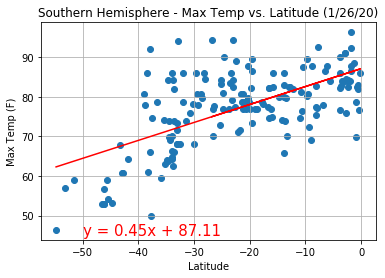

R-value: 0.6274494720789612, P-value: 3.2626553136529747e-20


In [18]:
smax=southern['Max Temp']
slat=southern['Lat']

lregress(slat,smax)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Comment: there is a moderate (r-squared=0.48) positive correlation between latitude and humidity. Perhaps this is due to ice accumulation around the North Pole?

x-value for location of line equation45
y-value for location of line equation25
Title of figure:Northern Hemisphere - Humidity (%) vs. Latitude (1/26/20)
X-label:Latitude
Y-label:Humidity (%)


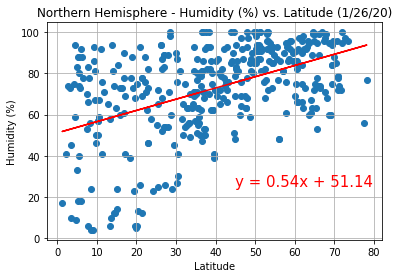

R-value: 0.48225957575412814, P-value: 4.143937739021233e-24


In [19]:
nhumidity=northern['Humidity']

lregress(nlat,nhumidity)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Comment: There is a weak (r-squared=0.25) positive correlation between latitude and humidity in the Southern Hemisphere.  Perhaps this is skewed by the fact that there is so much less land mass (and even fewer cities) around the South Pole.

x-value for location of line equation-50
y-value for location of line equation30
Title of figure:Southern Hemisphere - Humidity (%) vs. Latitude (1/26/20)
X-label:Latitude
Y-label:Humidity (%)


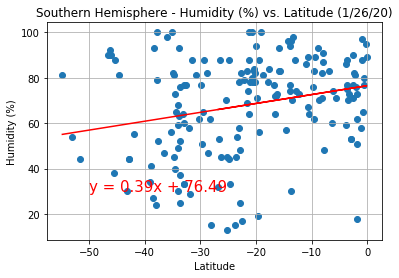

R-value: 0.24501941490532983, P-value: 0.0011974273072933768


In [20]:
shumidity=southern['Humidity']

lregress(slat,shumidity)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Comment: there is a weak (r-squared=0.31) but significant positive correlation between cloudiness and latitude in the Northern Hemisphere. I wouldn't use latitude as a predictor of cloudiness on its own, however.

x-value for location of line equation40
y-value for location of line equation30
Title of figure:Northern Hemisphere - Cloudiness (%) vs. Latitude (1/26/20)
X-label:Latitude
Y-label:Cloudiness (%)


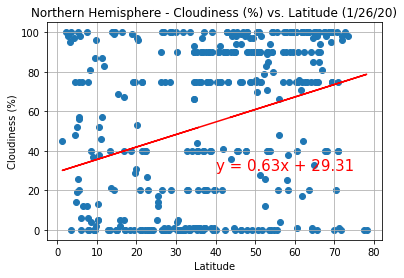

R-value: 0.3102130934339096, P-value: 3.8082340218162934e-10


In [21]:
nclouds=northern['Cloudiness']

lregress(nlat,nclouds)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Comment: There is a weak (r-squared=0.36) but significant positive correlation between latitude and cloudiness in the Southern Hemisphere. Again, more land mass exists closer to the Equator, so there are most likely more data points (potential for clouds) further North. 

x-value for location of line equation-55
y-value for location of line equation60
Title of figure:Southern Hemisphere - Cloudiness (%) vs. Latitude (1/26/20)
X-label:Latitude
Y-label:Cloudiness (%)


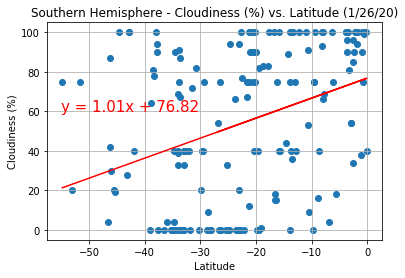

R-value: 0.3575044084253492, P-value: 1.475583529418231e-06


In [23]:
sclouds=southern['Cloudiness']

lregress(slat,sclouds)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Comment: as I suspected, there is no correlation (r-squared=0.04) between wind speed and latitude in the Northern Hemisphere.

x-value for location of line equation5
y-value for location of line equation25
Title of figure:Northern Hemisphere - Wind Speed (mph) vs. Latitude (1/26/20)
X-label:Latitude
Y-label:Wind Speed (mph)


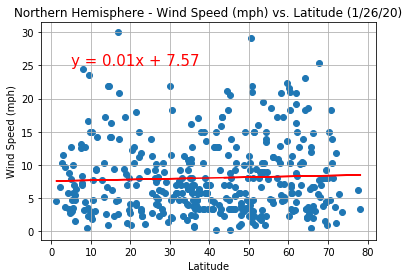

R-value: 0.04092002213561149, P-value: 0.42032971761464755


In [25]:
nwind=northern['Wind Speed']

lregress(nlat,nwind)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Comment: There is a weak (r-squared=-0.33) negative correlation between latitude and wind speed in the Southern Hemisphere. Again, this is possibly skewed by the lack of data points as one heads South from teh Equator.

x-value for location of line equation-50
y-value for location of line equation25
Title of figure:Southern Hemisphere - Wind Speed (mph) vs. Latitude (1/26/20)
X-label:Latitude
Y-label:Wind Speed (mph)


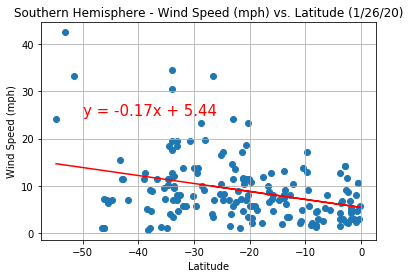

R-value: -0.3309900423155263, P-value: 9.211750431646887e-06


In [27]:
swind=southern['Wind Speed']

lregress(slat,swind)